In [7]:
paragraph = open('bolt.txt', encoding='utf-8').read()

In [6]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
!pip install genesim

ERROR: Could not find a version that satisfies the requirement genesim (from versions: none)
ERROR: No matching distribution found for genesim


In [5]:
pip install -U gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=c9b45c0054ec63a4b82c5e4bbcbe37c9d5fffde4ce53ce1e5197b1c7713840bb
  Stored in directory: c:\users\amitesh.patel\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [9]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['he low snap of a single gunshot bursts from eight speakers at once.',
 "each speaker is positioned behind a single man, and each man is positioned more or less identically in a sprinter's crouch: his feet in the starting blocks, his legs slightly bent, his rear end higher than his shoulders, his fingers splayed on but not beyond the white chalk of the starting line.",
 'the color schemes of their lycra uniforms are different — the blue and white of the united states, the red and white of trinidad and tobago, the green and yellow of jamaica — but otherwise, at this moment, their heads down, their faces invisible, their bodies immobile, it is hard to tell the runners apart.',
 'the individuation begins as soon as the sound waves conveying the gunshot traverse the two meters or so between the speakers and the ears of the men.',
 'reaction times differ.',
 'the theoretical limit of reaction time in this race, taking into account the time it takes for the sound waves to reach the ears of 

In [10]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
sent_word

[['he',
  'low',
  'snap',
  'of',
  'a',
  'single',
  'gunshot',
  'bursts',
  'from',
  'eight',
  'speakers',
  'at',
  'once',
  '.'],
 ['each',
  'speaker',
  'is',
  'positioned',
  'behind',
  'a',
  'single',
  'man',
  ',',
  'and',
  'each',
  'man',
  'is',
  'positioned',
  'more',
  'or',
  'less',
  'identically',
  'in',
  'a',
  'sprinter',
  "'s",
  'crouch',
  ':',
  'his',
  'feet',
  'in',
  'the',
  'starting',
  'blocks',
  ',',
  'his',
  'legs',
  'slightly',
  'bent',
  ',',
  'his',
  'rear',
  'end',
  'higher',
  'than',
  'his',
  'shoulders',
  ',',
  'his',
  'fingers',
  'splayed',
  'on',
  'but',
  'not',
  'beyond',
  'the',
  'white',
  'chalk',
  'of',
  'the',
  'starting',
  'line',
  '.'],
 ['the',
  'color',
  'schemes',
  'of',
  'their',
  'lycra',
  'uniforms',
  'are',
  'different',
  '—',
  'the',
  'blue',
  'and',
  'white',
  'of',
  'the',
  'united',
  'states',
  ',',
  'the',
  'red',
  'and',
  'white',
  'of',
  'trinidad',
  'an

In [14]:
# removing stopwords

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amitesh.Patel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
sent_word

[['low', 'snap', 'single', 'gunshot', 'bursts', 'eight', 'speakers', '.'],
 ['speaker',
  'positioned',
  'behind',
  'single',
  'man',
  ',',
  'man',
  'positioned',
  'less',
  'identically',
  'sprinter',
  "'s",
  'crouch',
  ':',
  'feet',
  'starting',
  'blocks',
  ',',
  'legs',
  'slightly',
  'bent',
  ',',
  'rear',
  'end',
  'higher',
  'shoulders',
  ',',
  'fingers',
  'splayed',
  'beyond',
  'white',
  'chalk',
  'starting',
  'line',
  '.'],
 ['color',
  'schemes',
  'lycra',
  'uniforms',
  'different',
  '—',
  'blue',
  'white',
  'united',
  'states',
  ',',
  'red',
  'white',
  'trinidad',
  'tobago',
  ',',
  'green',
  'yellow',
  'jamaica',
  '—',
  'otherwise',
  ',',
  'moment',
  ',',
  'heads',
  ',',
  'faces',
  'invisible',
  ',',
  'bodies',
  'immobile',
  ',',
  'hard',
  'tell',
  'runners',
  'apart',
  '.'],
 ['individuation',
  'begins',
  'soon',
  'sound',
  'waves',
  'conveying',
  'gunshot',
  'traverse',
  'two',
  'meters',
  'speakers'

In [21]:
# Create a set of frequent words

stoplist = set('for a of the and to in'.split(' '))

# Lowercase each document, split it by white space and filter out stopwords
sent_word = [[word for word in document.lower().split() if word not in stoplist]
         for document in sentences]
# Count word frequencies
from collections import defaultdict

frequency = defaultdict(int)

for text in sent_word:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in sent_word]
pprint.pprint(processed_corpus)

[['he', 'single', 'gunshot', 'from', 'speakers', 'at'],
 ['each',
  'is',
  'positioned',
  'single',
  'each',
  'man',
  'is',
  'positioned',
  'more',
  'or',
  'less',
  'his',
  'feet',
  'starting',
  'blocks,',
  'his',
  'legs',
  'his',
  'end',
  'higher',
  'than',
  'his',
  'his',
  'on',
  'but',
  'not',
  'white',
  'starting'],
 ['their',
  'are',
  '—',
  'white',
  'united',
  'white',
  'trinidad',
  'jamaica',
  '—',
  'but',
  'at',
  'this',
  'their',
  'heads',
  'down,',
  'their',
  'their',
  'bodies',
  'it',
  'is',
  'hard',
  'runners'],
 ['begins',
  'as',
  'as',
  'sound',
  'waves',
  'gunshot',
  'two',
  'meters',
  'or',
  'so',
  'between',
  'speakers',
  'ears'],
 ['reaction'],
 ['limit',
  'reaction',
  'time',
  'this',
  'race,',
  'into',
  'time',
  'it',
  'takes',
  'sound',
  'waves',
  'reach',
  'ears',
  'sprinters',
  'time',
  'it',
  'takes',
  'their',
  'sound',
  'waves',
  'their',
  'is',
  '.'],
 [],
 ['starting',
  'each',

In [18]:
import pprint

In [22]:
# Creating dictionaries, which helps during Topic modelling
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(153 unique tokens: ['at', 'from', 'gunshot', 'he', 'single']...)


In [23]:
# Vectore representation 
pprint.pprint(dictionary.token2id)

{',': 67,
 '-meter': 69,
 '.': 48,
 'about': 81,
 'after': 59,
 'against': 73,
 'ahead': 114,
 'an': 115,
 'anyone': 123,
 'approximately': 131,
 'are': 25,
 'as': 38,
 'at': 0,
 'been': 82,
 'before': 138,
 'begin': 60,
 'beginning': 56,
 'begins': 39,
 'between': 40,
 'blocks,': 6,
 'bodies': 26,
 'bolt': 78,
 "bolt's": 124,
 'but': 7,
 'by': 71,
 'come': 102,
 'cross': 140,
 'difference': 132,
 'distance': 83,
 'does': 98,
 'down,': 27,
 'drive': 103,
 'during': 95,
 'each': 8,
 'ears': 41,
 "else's,": 125,
 'end': 9,
 'ever.': 126,
 'false': 61,
 'fast': 119,
 'feet': 10,
 'finish': 143,
 'forward': 99,
 'from': 1,
 'full': 120,
 'ground': 96,
 'gunshot': 2,
 'happens': 101,
 'hard': 28,
 'has': 90,
 'he': 3,
 "he's": 84,
 'heads': 29,
 'higher': 11,
 'him': 112,
 'his': 12,
 'hundredths': 74,
 'impact': 116,
 'inches': 111,
 'into': 49,
 'is': 13,
 'it': 30,
 'jamaica': 31,
 'jamaican': 148,
 'lane': 149,
 'left': 97,
 'legs': 14,
 'less': 15,
 'limit': 50,
 'line': 62,
 'line,': 

In [24]:
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


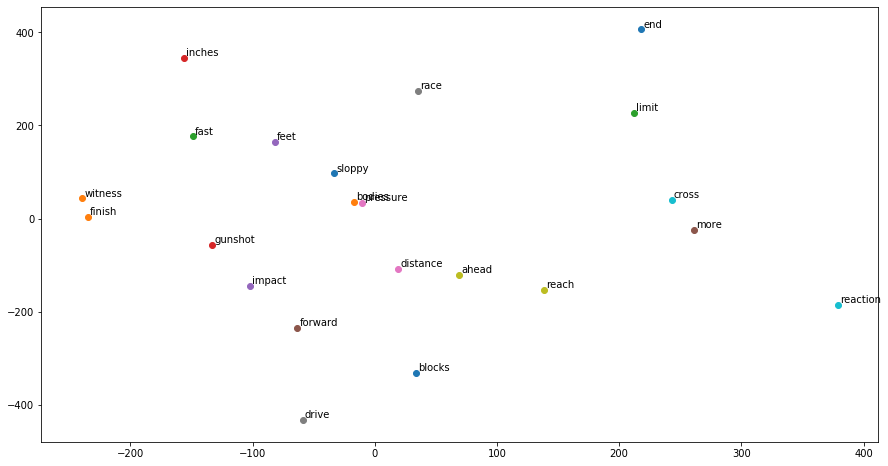

In [27]:
from sklearn.manifold import  TSNE
vocab = ['blocks','bodies','limit','inches','feet','forward','distance','drive','ahead','cross','end','finish','fast','gunshot','impact','more','pressure','race','reach','reaction','sloppy','witness']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)